In [1]:
# 교재 p285~

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [39]:
import mglearn
X,y=mglearn.datasets.make_wave(n_samples=120) #회귀를 위한 데이터

In [40]:
X.shape, np.min(X), np.max(X)

((120, 1), -2.9668672972583856, 2.9213216196031038)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

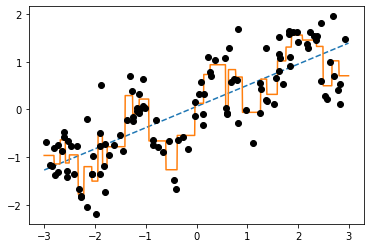

In [42]:
dtr = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
lr = LinearRegression().fit(X, y)

line = np.linspace(-3, 3, 1000, endpoint=False)  # -3, 3 까지는 X값이 이사이에 있기 때문에
line = line.reshape(-1,1)   #1차원 -> 2차원으로 변형.  // -1은 알아서 결정하라는 의미.

plt.plot(line, lr.predict(line), '--')   # LinearRegressor으로 예측한 값 그래프
plt.plot(line, dtr.predict(line))        # DecisionTreeRegressor로 예측한 값 그래프
plt.plot(X[:, 0], y, 'o' ,c='black')  #실제 데이터 그래프

plt.show()

In [43]:
lr.score(X, y) ,dtr.score(X,y)

(0.6263363499825908, 0.8562462696125981)

In [44]:
from sklearn.preprocessing import KBinsDiscretizer     #전처리 작업

In [45]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')  #전체 데이터를 10개의 구간으로 나누고 단일값으로 반환
kb.fit(X)
X_binned=kb.transform(X)

In [46]:
X[:10], X_binned[:10].toarray()

(array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816],
        [-2.06403288],
        [-2.65149833],
        [ 2.19705687],
        [ 0.60669007],
        [ 1.24843547]]),
 array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]]))

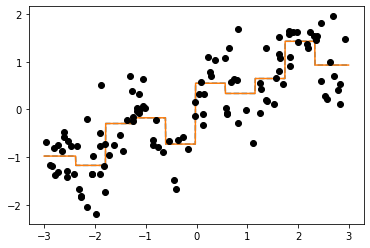

In [47]:
dtr = DecisionTreeRegressor(min_samples_leaf=3).fit(X_binned.toarray(),y)
lr = LinearRegression().fit(X_binned.toarray(), y)

line = np.linspace(-3, 3, 1000, endpoint=False)  # -3, 3 까지는 X값이 이사이에 있기 때문에
line = line.reshape(-1,1)   #1차원 -> 2차원으로 변형.  // -1은 알아서 결정하라는 의미.
line_binned=kb.transform(line)

plt.plot(line, lr.predict(line_binned.toarray()), '--')   # LinearRegressor으로 예측한 값 그래프
plt.plot(line, dtr.predict(line_binned.toarray()))        # DecisionTreeRegressor로 예측한 값 그래프
plt.plot(X[:, 0], y, 'o' ,c='black')  #실제 데이터 그래프

plt.show()

In [48]:
# X_binned[:20].toarray()
# lr.predict(line_binned.toarray())    #같은 범위 안에 있는 데이터 같은값으로 처리됨

lr.score(X_binned.toarray(), y) , dtr.score(X_binned.toarray(), y)  #구간별 정확도 

(0.7237309728172019, 0.7237309728172019)

In [49]:
X_combined = np.hstack([X, X_binned.toarray()])

In [50]:
print(X_combined.shape)
X_combined[:5]

(120, 11)


array([[-0.75275929,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.70428584,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 1.39196365,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.59195091,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-2.06388816,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [51]:
lr.coef_      

array([-1.03201943, -1.22695979, -0.34954264, -0.2295748 , -0.78029033,
        0.49470868,  0.28071025,  0.59355014,  1.37382361,  0.8755943 ])

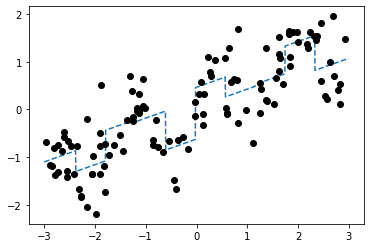

In [52]:
dtr = DecisionTreeRegressor(min_samples_leaf=3).fit(X_combined,y)
lr = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned.toarray()])

plt.plot(line, lr.predict(line_combined), '--')   # LinearRegressor으로 예측한 값 그래프
# plt.plot(line, dtr.predict(line_combined))        # DecisionTreeRegressor로 예측한 값 그래프
plt.plot(X[:, 0], y, 'o' ,c='black')  #실제 데이터 그래프

plt.show()

In [53]:
lr.coef_  

array([ 0.37891039, -0.02879907, -0.46519195,  0.17621386,  0.13142368,
       -0.68549904,  0.39882373, -0.01863165,  0.02106605,  0.6006746 ,
       -0.13008021])

In [54]:
lr.score(X_combined, y) , dtr.score(X_combined, y)

(0.7277571512572492, 0.8562462696125981)

In [56]:
X_product = np.hstack([X_binned.toarray(), X*X_binned.toarray()])    # X*X_binned  X값에 X_bined 곱해서 추가
X_product.shape

(120, 20)

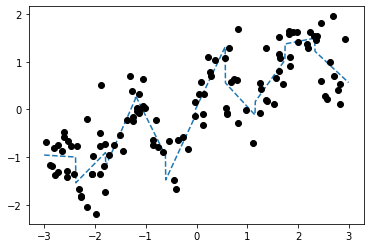

In [57]:
dtr = DecisionTreeRegressor(min_samples_leaf=3).fit(X_product,y)
lr = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned.toarray(), line*line_binned.toarray()])

plt.plot(line, lr.predict(line_product), '--')   # LinearRegressor으로 예측한 값 그래프
# plt.plot(line, dtr.predict(line_product))        # DecisionTreeRegressor로 예측한 값 그래프
plt.plot(X[:, 0], y, 'o' ,c='black')  #실제 데이터 그래프

plt.show()

In [58]:
lr.score(X_product, y) , dtr.score(X_product, y)

(0.787287089329761, 0.8445439930757523)

In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
poly = PolynomialFeatures(degree=10, include_bias=False)   #degree=차수 설정
poly.fit(X)
X_poly = poly.transform(X)

In [62]:
print(X.shape, X_poly.shape)
poly.get_feature_names()

(120, 1) (120, 10)


['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

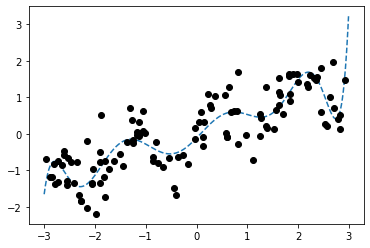

In [63]:
dtr = DecisionTreeRegressor(min_samples_leaf=3).fit(X_poly,y)
lr = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)

plt.plot(line, lr.predict(line_poly), '--')   # LinearRegressor으로 예측한 값 그래프
# plt.plot(line, dtr.predict(line_poly))        # DecisionTreeRegressor로 예측한 값 그래프
plt.plot(X[:, 0], y, 'o' ,c='black')  #실제 데이터 그래프

plt.show()

In [64]:
lr.score(X_poly, y) , dtr.score(X_poly, y)

(0.7346894080529943, 0.8562462696125981)

In [ ]:
# 일변량 비선형 변환 // 교재 p299

In [72]:
np.random.seed(0)
X_org = np.random.normal(size=(1000, 3))   # 1000 row x 3 columns(features)
w = np.random.normal(size = 3)

X = np.random.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [73]:
np.mean(X_org), np.std(X_org)

(-0.027622776946568013, 0.9703051206423566)

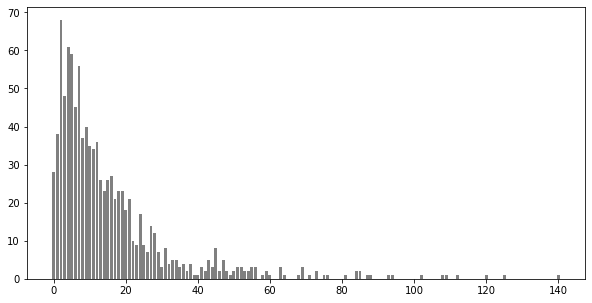

In [75]:
bins = np.bincount(X[:,0])
plt.figure(figsize=(10,5))
plt.bar(range(len(bins)), bins, color="grey")
plt.show()

In [77]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
ridge = Ridge().fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.6564225882120297, 0.6116141061920278)

In [94]:
X_train_log = np.log(X_train + 1 )
X_test_log = np.log(X_test + 1 )

X_train_sqrt=np.sqrt(X_train)
X_test_sqrt=np.sqrt(X_test)

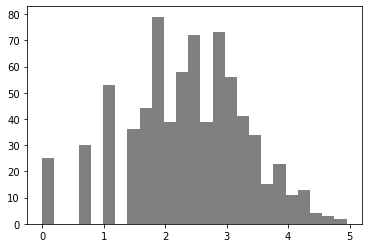

In [95]:
plt.hist(X_train_log[:, 0], bins=25, color = 'grey')
plt.show()

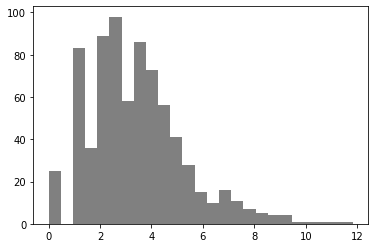

In [96]:
plt.hist(X_train_sqrt[:, 0], bins=25, color = 'grey')
plt.show()

In [97]:
print( Ridge().fit(X_train_log, y_train).score(X_test_log, y_test))
print( Ridge().fit(X_train_sqrt, y_train).score(X_test_sqrt, y_test))

0.8806884060113291
0.8312531066975319


In [ ]:
# 교재 p305   # extraction 새로운 속성 발견 , selection : 가지고 있던 속성으로 진행

In [98]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression, f_classif ,chi2  
# chi2 : 범주형 변수간의 독립성(상관성) 확인에 사용.   
# f_regression: 분산분석(2개 t분포 / 3개이상 f분포 사용 // 연속성,상관성 확인에 사용)
# f_classif:

In [102]:
cancer = load_breast_cancer()

np.random.seed(42)
noise = np.random.normal(size=(len(cancer.data), 50))   # 50개의 새로운 컬럼을 추가 (make new 50 columns)

X_w_noise = np.hstack([cancer['data'], noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer['target'], random_state=42)

In [103]:
X_train.shape   #속성이 30개 -> 80개로 늘어남.

(426, 80)

In [107]:
select = SelectPercentile(score_func=f_classif, percentile=40)   
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

In [108]:
X_train_selected.shape

(426, 32)

In [109]:
select.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False])

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
lr=LogisticRegression(max_iter=5000)

lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

lr.fit(X_train_selected, y_train)
X_test_selected = select.transform(X_test)
print(lr.score(X_train_selected, y_train), lr.score(X_test_selected, y_test))

0.9976525821596244 0.965034965034965
0.9624413145539906 0.965034965034965


In [112]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [114]:
rfc=RandomForestClassifier(n_estimators=100, random_state=42)
select = SelectFromModel(rfc, threshold="median")

In [116]:
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

In [117]:
X_train.shape , X_train_selected.shape

((426, 80), (426, 40))

In [118]:
select.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False])

In [119]:
lr=LogisticRegression(max_iter=5000)

lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

lr.fit(X_train_selected, y_train)
X_test_selected = select.transform(X_test)
print(lr.score(X_train_selected, y_train), lr.score(X_test_selected, y_test))

0.9976525821596244 0.965034965034965
0.9671361502347418 0.965034965034965


In [120]:
from sklearn.feature_selection import RFE

In [121]:
select = RFE(rfc, n_features_to_select=40)

select.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=40)

In [122]:
select.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False])

In [123]:
lr=LogisticRegression(max_iter=5000)

lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)
lr.fit(X_train_selected, y_train)

print(lr.score(X_train_selected, y_train), lr.score(X_test_selected, y_test))

0.9976525821596244 0.965034965034965
0.9671361502347418 0.965034965034965
